<a href="https://colab.research.google.com/github/alex-morozov-98/Thesis/blob/main/Search_for_miRNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Settings

In [ ]:
import scipy
import numpy as np 
import pandas as pd

import itertools
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
### grant access to your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### set the number of dataframe rows you would like to display
pd.options.display.max_rows = 10

In [ ]:
### install GProfiler
!pip install gprofiler-official

In [ ]:
from gprofiler import GProfiler

# Get the enriched lists of differentially expressed genes

You should upload csv files obtained during semantic analysis in R to your Google Drive. Please, add the pathways to these files to variable "files". Please, list GO, KEGG, Reactome and DO terms of your interest or substrings (key words) of these terms in the variable "terms".
NB! It is highly recommended that you use files obtained right after the R packages procession. If you read and process these files in Excel before uploading them to Google drive please make sure not to resave them in Excel because Excel saves some data in the date format which can't be processed by pandas causing errors.

In [ ]:
### select downregulated genes
files = ['/content/drive/MyDrive/Colab Notebooks/EGO_DO_down.csv',
         '/content/drive/MyDrive/Colab Notebooks/EGO_GO_down.csv',
         '/content/drive/MyDrive/Colab Notebooks/EGO_KEGG_down.csv',
         '/content/drive/MyDrive/Colab Notebooks/Reactome_down.csv']

terms = ['cellular', 'stem', 'fibrosis', 'wound', 'differentitation', 
         'actin', 'matrix', 'fibroblast', 'myofibroblast', 'myofibril',
         'wounding', 'muscle', 'extracellular', 'encapsulating', 
         'mesenchymal', 'collagen', 'contraction', 'ECM', 'Matrix Metalloproteinases']
down = []

for f in files:        
    genf = pd.read_csv(f, sep=',')
    interest = genf.loc[genf['Description'].apply(lambda x: any( word in x for word in terms))]
    down_inter = []
    for i in interest['geneID']:
        a = list(i.split("/"))
        down_inter = down_inter + a
    uni = set(down_inter)
    down_inter = list(uni)
    down = down + down_inter
unid = set(down)
down = list(unid)
print(down)
print("Number of genes selected:", len(down))

['CSRP1', 'PPP1R14A', 'POSTN', 'MYLK', 'CNN1', 'CD36', 'COL4A1', 'MYL9', 'CSRP2', 'ACTG2', 'ACTA2', 'MYH11', 'ITGA1', 'COL4A2', 'CALD1', 'CAV1']
Number of genes selected: 16


In [ ]:
### select upregulated genes
files = ['/content/drive/MyDrive/Colab Notebooks/EGO_DO_up.csv',
         '/content/drive/MyDrive/Colab Notebooks/EGO_GO_up.csv',
         '/content/drive/MyDrive/Colab Notebooks/EGO_KEGG_up.csv',
         '/content/drive/MyDrive/Colab Notebooks/Reactome_up.csv']

terms = ['cellular', 'stem', 'fibrosis', 'wound', 'differentitation', 
         'actin', 'matrix', 'fibroblast', 'myofibroblast', 'myofibril',
         'wounding', 'muscle', 'extracellular', 'encapsulating', 
         'mesenchymal', 'collagen', 'contraction', 'ECM', 'Matrix Metalloproteinases']
up = []

for f in files:        
    genf = pd.read_csv(f, sep=',')
    interest = genf.loc[genf['Description'].apply(lambda x: any( word in x for word in terms))]
    up_inter = []
    for i in interest['geneID']:
        a = list(i.split("/"))
        up_inter = up_inter + a
    uni = set(up_inter)
    up_inter = list(uni)
    up = up + up_inter
unid = set(up)
up = list(unid)
print(up)
print("Number of genes selected:", len(up))

['DCN', 'VCAN', 'HMOX1', 'MMP2', 'DPT', 'CLU', 'SFRP2', 'LUM', 'TIMP1']
Number of genes selected: 9


#Preprocessing of Mirnet database

In [ ]:
### upload mirnet database
mirnet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/mirnet.csv")


In [ ]:
mirnet[0:5]

,mirnet,mir_id,mir_acc,symbol,embl,entrez,experiment,pmid
0,mirnet-hsa-1,hsa-let-7a-5p,MIMAT0000062,ACTA1,ENSG00000143632,58,PAR-CLIP,21572407
1,mirnet-hsa-2,hsa-let-7a-5p,MIMAT0000062,ACTB,ENSG00000075624,60,CLASH,23622248
2,mirnet-hsa-3,hsa-let-7a-5p,MIMAT0000062,ACVR1B,ENSG00000135503,91,CLASH,23622248
3,mirnet-hsa-4,hsa-let-7a-5p,MIMAT0000062,ADH5,ENSG00000197894,128,HITS-CLIP//PAR-CLIP,23313552|26701625|27292025
4,mirnet-hsa-5,hsa-let-7a-5p,MIMAT0000062,PARP1,ENSG00000143799,142,Luciferase reporter assay//qRT-PCR//Western blot,28031413


In [ ]:
### mirnet db to search for micrornas against genes in question
gmirnet = mirnet.set_index("symbol")
gmirnet[0:5]
gmirind = list(gmirnet.index)

In [ ]:
### mirnet db to search for target genes of mirnas in question
mmirnet = mirnet.set_index("mir_id")
mmirnet[0:5]
mmirind = list(mmirnet.index)

#Get microRNAs 

###Downregulated

In [ ]:
### search for mirnas against downregulated genes
dmir = []
for i in down:
    if i not in gmirind:
      next
    else:
      a = list(gmirnet.loc[i, "mir_id"])
      dmir = dmir + a

dmir = set(dmir)
dmir = list(dmir)
len(dmir)

321

In [ ]:
### get all targets of mirnas against downregulated genes
dtargets = {}
for i in dmir:
    if i not in mmirind:
      next
    else:
      a = list(mmirnet.loc[i, "symbol"])
      dtargets[i] = a
dtg = pd.Series(dtargets).to_frame('all targets')

In [ ]:
### count downregulated genes among all targets of a particular microrna
dtgind = list(dtg.index)
dpercent = {}
dcross = {}
dallnum = {}
dcrossnum = {}
for i in dtgind:
  allgenes = list(dtg.loc[i])[0]
  dallnum[i] = len(allgenes)
  cross = [x for x in allgenes if x in down]
  dcross[i] = cross
  dcrossnum[i] = len(cross)
  percent = (len(cross)/len(allgenes)) * 100
  dpercent[i] = percent

dprc = pd.Series(dpercent).to_frame('percent of downregulated among all, %')
dcr = pd.Series(dcross).to_frame('downregulated')
dan = pd.Series(dallnum).to_frame('number of all targets')
dcn = pd.Series(dcrossnum).to_frame('number of downregulated targets')
dfinal = pd.concat([dtg, dcr, dan, dcn, dprc], axis=1)
dfinal

,all targets,downregulated,number of all targets,number of downregulated targets,"percent of downregulated among all, %"
hsa-mir-140-3p,"[ABL2, ACVR2B, ADARB1, AHCY, AMFR, BCAT1, KLF9...",[COL4A1],224,1,0.446429
hsa-mir-4430,"[ABCF1, ABL2, ADAR, ADCY2, ANG, XIAP, BIRC5, A...",[MYH11],397,1,0.251889
hsa-mir-4482-3p,"[MAPK14, CSRP1, DSPP, EEF1A1, GABRB1, GALNT1, ...",[CSRP1],93,1,1.075269
hsa-mir-8052,"[APBA1, ATP1B3, C3, CAPNS1, CAPZA2, CAV2, CEAC...",[CSRP1],138,1,0.724638
hsa-mir-519d-5p,"[ARL4D, ATP1B3, SERPING1, CACNA1A, CCNF, CDK9,...",[CSRP1],141,1,0.709220
...,...,...,...,...,...
hsa-mir-7159-3p,"[MAPK14, CSRP1, DSPP, EEF1A1, GABRB1, GABRG2, ...",[CSRP1],86,1,1.162791
hsa-mir-8070,"[ALDH9A1, ATM, ZFP36L1, CD81, COL4A1, COL19A1,...",[COL4A1],73,1,1.369863
hsa-mir-574-5p,"[ACVR2B, GRK3, AMD1, ANG, APBA1, ARRB1, ASNA1,...",[ITGA1],415,1,0.240964
hsa-mir-8485,"[ABL2, ACVR1B, ADCYAP1R1, ADRB3, GRK3, ALDH1A3...","[CD36, ITGA1]",877,2,0.228050


###Upregulated

In [ ]:
### search for mirnas against upregulated genes
umir = []
for i in up:
    if i not in gmirind:
      next
    else:
      a = list(gmirnet.loc[i, "mir_id"])
      umir = umir + a

umir = set(umir)
umir = list(umir)
len(umir)

191

In [ ]:
### get all targets of mirnas against upregulated genes
utargets = {}
for i in umir:
    if i not in mmirind:
      next
    else:
      a = list(mmirnet.loc[i, "symbol"])
      utargets[i] = a
utg = pd.Series(utargets).to_frame('all targets')

In [ ]:
### count upregulated genes among all targets of a particular microrna
utgind = list(utg.index)
upercent = {}
ucross = {}
uallnum = {}
ucrossnum = {}
for i in utgind:
  allgenes = list(utg.loc[i])[0]
  uallnum[i] = len(allgenes)
  cross = [x for x in allgenes if x in up]
  ucross[i] = cross
  ucrossnum[i] = len(cross)
  percent = (len(cross)/len(allgenes)) * 100
  upercent[i] = percent

uprc = pd.Series(upercent).to_frame('percent of upregulated among all, %')
ucr = pd.Series(ucross).to_frame('upregulated')
uan = pd.Series(uallnum).to_frame('number of all targets')
ucn = pd.Series(ucrossnum).to_frame('number of upregulated targets')
ufinal = pd.concat([utg, ucr, uan, ucn, uprc], axis=1)
ufinal

,all targets,upregulated,number of all targets,number of upregulated targets,"percent of upregulated among all, %"
hsa-mir-4430,"[ABCF1, ABL2, ADAR, ADCY2, ANG, XIAP, BIRC5, A...",[HMOX1],397,1,0.251889
hsa-mir-571,"[CCNF, CLU, CREBBP, GPR183, CELSR3, EREG, G6PD...",[CLU],75,1,1.333333
hsa-mir-3612,"[ABCF1, ACOX1, ADD2, GRK2, ALDOA, AR, ARHGDIA,...","[CLU, HMOX1]",424,2,0.471698
hsa-mir-544a,"[ACACB, ACTB, ADM, ALDOA, ATP6V1B2, BCL6, BMI1...",[MMP2],151,1,0.662252
hsa-mir-15a-5p,"[ABL2, ACOX1, ACVR1B, ACVR2A, ADORA3, ADRA2B, ...",[CLU],717,1,0.139470
...,...,...,...,...,...
hsa-mir-8085,"[ABCB7, AMD1, XIAP, AQP2, AR, ASPH, ATP2A3, AT...",[CLU],356,1,0.280899
hsa-mir-4492,"[ABL1, CACNA1C, SERPINH1, CCNF, CDK2, COL1A1, ...",[HMOX1],119,1,0.840336
hsa-mir-545-3p,"[ZFHX3, ATP5G3, CCND1, DST, CDK4, COL12A1, CSN...",[VCAN],165,1,0.606061
hsa-mir-23b-3p,"[ABCF1, ACAT1, ACTN4, ACVR2B, ADD3, GRK2, ALDO...",[VCAN],322,1,0.310559


###Overlapping and unique microRNAs

In [ ]:
### from table above we'll find out which mirnas target only up or downregulated genes, 
### and which have targets in both lists

cross = [x for x in dmir if x in umir and x in mmirind]
print(len(cross))
ucross = ufinal.loc[cross]
dcross = dfinal.loc[cross].drop(["all targets", 'number of all targets'], axis=1)
crossfinal = pd.concat([ucross, dcross], axis=1)

unique_dfinal = dfinal.drop(cross)
unique_ufinal = ufinal.drop(cross)

51


In [ ]:
### write all the three tables in one excel file

with pd.ExcelWriter('mirnas_targets_enrichment.xlsx') as writer:  
    unique_ufinal.to_excel(writer, sheet_name='Upregulated')
    unique_dfinal.to_excel(writer, sheet_name='Downregulated')
    crossfinal.to_excel(writer, sheet_name='Overlapping')

from google.colab import files
files.download('mirnas_targets_enrichment.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

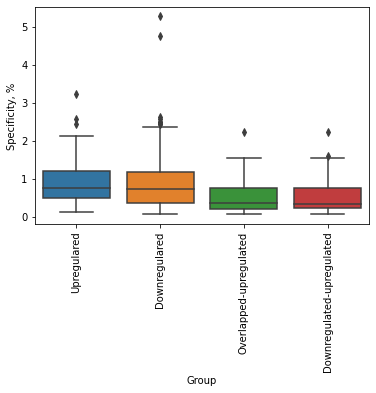

In [ ]:
### Draw the boxplot of microRNAs specificity

u = {'Specificity, %': list(unique_ufinal['percent of upregulated among all, %']),
      'Group': ['Upregulared']*unique_ufinal.shape[0]}
udf = pd.DataFrame(data=u)
d = {'Specificity, %': list(unique_dfinal['percent of downregulated among all, %']),
      'Group': ['Downregulared']*unique_dfinal.shape[0]}
ddf = pd.DataFrame(data=d)
ou = {'Specificity, %': list(crossfinal['percent of upregulated among all, %']),
      'Group': ['Overlapped-upregulated']*crossfinal.shape[0]}
oudf = pd.DataFrame(data=ou)
od = {'Specificity, %': list(crossfinal['percent of downregulated among all, %']),
      'Group': ['Downregulated-upregulated']*crossfinal.shape[0]}
oddf = pd.DataFrame(data=od)

f = pd.concat([udf, ddf, oudf, oddf])
group = f['Group']
spec = f['Specificity, %']
boxplot = sn.boxplot(x=group, y=spec)
plt.setp(boxplot.get_xticklabels(), rotation=90)
fig = boxplot.get_figure()
fig.savefig("specificity_boxplot.png", bbox_inches='tight')
from google.colab import files
files.download('specificity_boxplot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

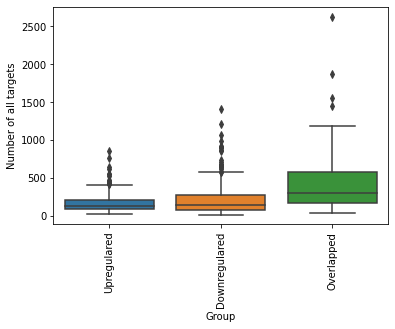

In [ ]:
### Draw the boxplot of all microRNAs gene targets number

u = {'Number of all targets': list(unique_ufinal['number of all targets']),
      'Group': ['Upregulared']*unique_ufinal.shape[0]}
udf = pd.DataFrame(data=u)
d = {'Number of all targets': list(unique_dfinal['number of all targets']),
      'Group': ['Downregulared']*unique_dfinal.shape[0]}
ddf = pd.DataFrame(data=d)
o = {'Number of all targets': list(crossfinal['number of all targets']),
      'Group': ['Overlapped']*crossfinal.shape[0]}
odf = pd.DataFrame(data=o)


f = pd.concat([udf, ddf, odf])
group = f['Group']
spec = f['Number of all targets']
boxplot = sn.boxplot(x=group, y=spec)
plt.setp(boxplot.get_xticklabels(), rotation=90)
fig = boxplot.get_figure()
fig.savefig("number_of_targets_boxplot.png", bbox_inches='tight')
from google.colab import files
files.download('number_of_targets_boxplot.png')

#PCR array validation filter (optional)

NB! Before uploading pcr array file, make sure that microRNAs there are named in the following format: hsa-mir-@-@ or hsa-let-@-@. If it lacks hsa-, for example, or have r written as capital letter R, it will cause mistakes

In [ ]:
### upload file with selected from PCR array microRNAs
pcrar = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pcr_array_fibrotic.csv", header=None)
pcrar = list(pcrar[0])
pcrar[0:9]

['hsa-mir-194-5p',
 'hsa-mir-378a-3p',
 'hsa-mir-192-5p',
 'hsa-mir-148a-3p',
 'hsa-mir-449a',
 'hsa-mir-146a-5p',
 'hsa-mir-503-5p',
 'hsa-mir-874-3p',
 'hsa-mir-10a-5p']

In [ ]:
dmirlst = list(unique_dfinal.index)
umirlst = list(unique_ufinal.index)
omirlst = list(crossfinal.index)

In [ ]:
### validate microRNAs for downregulated genes:
dpcrar = [x for x in dmirlst if x in pcrar]
print(len(dpcrar))

### validate microRNAs for upregulated genes:
upcrar = [x for x in umirlst if x in pcrar]
print(len(upcrar))

### validate microRNAs for overlapped genes:
opcrar = [x for x in omirlst if x in pcrar]
print(len(opcrar))

13
6
7


In [ ]:
print("Downregulated:", dpcrar)
print("Upregulated:", upcrar)
print("Overlapped:", opcrar)

Downregulated: ['hsa-mir-92a-3p', 'hsa-mir-194-5p', 'hsa-mir-10a-5p', 'hsa-mir-27a-3p', 'hsa-mir-34a-5p', 'hsa-mir-27b-3p', 'hsa-mir-663a', 'hsa-mir-199a-5p', 'hsa-mir-20a-5p', 'hsa-mir-146a-5p', 'hsa-mir-5011-5p', 'hsa-mir-18a-5p', 'hsa-mir-192-5p']
Upregulated: ['hsa-mir-129-5p', 'hsa-mir-195-5p', 'hsa-mir-125b-5p', 'hsa-mir-143-3p', 'hsa-mir-451a', 'hsa-mir-377-3p']
Overlapped: ['hsa-mir-29c-3p', 'hsa-mir-29a-3p', 'hsa-mir-335-5p', 'hsa-mir-107', 'hsa-mir-29b-3p', 'hsa-mir-21-5p', 'hsa-mir-16-5p']


#GO and KEGG annotation of miRNAs gene targets

## Downregulated annotation


In [ ]:
### GO

dmirtgfun = {}
for i in dpcrar:
    targets = unique_dfinal.loc[i, "all targets"]
    gp = GProfiler(return_dataframe=True)
    gpdf = gp.profile(organism='hsapiens',
                      query=targets,
                      no_evidences=False,
                      sources = ["GO:BP"])
    fun = list(gpdf["name"])
    dmirtgfun[i] = fun
dtargfgo = pd.Series(dmirtgfun).to_frame('Target functions')

In [ ]:
dtargfgo

In [ ]:
### KEGG
dmirtgfun = {}
for i in dpcrar:
    targets = unique_dfinal.loc[i, "all targets"]
    gp = GProfiler(return_dataframe=True)
    gpdf = gp.profile(organism='hsapiens',
                      query=targets,
                      no_evidences=False,
                      sources = ["KEGG"])
    fun = list(gpdf["name"])
    dmirtgfun[i] = fun
dtargfkegg = pd.Series(dmirtgfun).to_frame('Target functions')

In [ ]:
dtargfkegg

In [ ]:
### Save to excel file
with pd.ExcelWriter('downregulated_targets_GO_KEGG.xlsx') as writer:  
    dtargfgo.to_excel(writer, sheet_name='GO')
    dtargfkegg.to_excel(writer, sheet_name='KEGG')

from google.colab import files
files.download('downregulated_targets_GO_KEGG.xlsx')

##Upregulated annotation

In [ ]:
### GO
umirtgfun = {}
for i in upcrar:
    targets = unique_ufinal.loc[i, "all targets"]
    gp = GProfiler(return_dataframe=True)
    gpdf = gp.profile(organism='hsapiens',
                      query=targets,
                      no_evidences=False,
                      sources = ["GO:BP"])
    fun = list(gpdf["name"])
    umirtgfun[i] = fun
utargfgo = pd.Series(umirtgfun).to_frame('Target functions')

In [ ]:
### KEGG
umirtgfun = {}
for i in upcrar:
    targets = unique_ufinal.loc[i, "all targets"]
    gp = GProfiler(return_dataframe=True)
    gpdf = gp.profile(organism='hsapiens',
                      query=targets,
                      no_evidences=False,
                      sources = ["KEGG"])
    fun = list(gpdf["name"])
    umirtgfun[i] = fun
utargfkegg = pd.Series(umirtgfun).to_frame('Target functions')

In [ ]:
### Save to excel file
with pd.ExcelWriter('upregulated_targets_GO_KEGG.xlsx') as writer:  
    utargfgo.to_excel(writer, sheet_name='GO')
    utargfkegg.to_excel(writer, sheet_name='KEGG')

from google.colab import files
files.download('upregulated_targets_GO_KEGG.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Overlapped

In [ ]:
### GO f
omirtgfun = {}
for i in opcrar:
    targets = crossfinal.loc[i, "all targets"]
    gp = GProfiler(return_dataframe=True)
    gpdf = gp.profile(organism='hsapiens',
                      query=targets,
                      no_evidences=False,
                      sources = ["GO:BP"])
    fun = list(gpdf["name"])
    omirtgfun[i] = fun
otargfgo = pd.Series(omirtgfun).to_frame('Target functions')

In [ ]:
### KEGG 
omirtgfun = {}
for i in opcrar:
    targets = crossfinal.loc[i, "all targets"]
    gp = GProfiler(return_dataframe=True)
    gpdf = gp.profile(organism='hsapiens',
                      query=targets,
                      no_evidences=False,
                      sources = ["KEGG"])
    fun = list(gpdf["name"])
    omirtgfun[i] = fun
otargfkegg = pd.Series(omirtgfun).to_frame('Target functions')

In [ ]:
### Save to excel file
with pd.ExcelWriter('overlapped_targets_GO_KEGG.xlsx') as writer:  
    otargfgo.to_excel(writer, sheet_name='GO')
    otargfkegg.to_excel(writer, sheet_name='KEGG')

from google.colab import files
files.download('overlapped_targets_GO_KEGG.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Term enrichment

In [ ]:
### GO
terms = [' stem', "fibrosis", 'wound', 'differentitation', 
         'actin', 'matrix', 'fibroblast', 'myofibroblast',
         'aging', 'senescence', 'apoptosis', 'wounding',
         'muscle', 'programmed', 'extracellular', 'encapsulating',
         'proliferation', 'mesenchymal']
enrich_terms = {}
for mir in list(otargfgo.index):
    group = otargfgo.loc[mir, "Target functions"]
    lst = []
    for t in terms:
      for name in group:
        if t in name:
          lst.append(name)
    enrich_terms[mir] = lst
enrichgo = pd.Series(enrich_terms).to_frame('Enriched functions')

In [ ]:
### KEGG
terms = [' stem', 'fibrosis', 'wound', 'differentitation', 
         'actin', 'matrix', 'fibroblast', 'myofibroblast',
         'aging', 'senescence', 'apoptosis', 'wounding',
         'muscle', 'programmed', 'extracellular', 'encapsulating',
         'proliferation', 'mesenchymal']
enrich_terms = {}
for mir in list(otargfkegg.index):
    group = otargfkegg.loc[mir, "Target functions"]
    lst = []
    for t in terms:
      for name in group:
        if t in name:
          lst.append(name)
    enrich_terms[mir] = lst
enrichkegg = pd.Series(enrich_terms).to_frame('Enriched functions')

In [ ]:
with pd.ExcelWriter('overlapped_enriched_terms_GO_KEGG.xlsx') as writer:  
    enrichgo.to_excel(writer, sheet_name='GO')
    enrichkegg.to_excel(writer, sheet_name='KEGG')

from google.colab import files
files.download('overlapped_enriched_terms_GO_KEGG.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>